INFO 7390 - Advances in Data Science and Architecture
Prof. Ram Hariharan

Final Group Project - Team Ace (Summer 2023)

#### MEMBERS :

1. Shreeyash Lahane (NUID 002743020)
2. Ram Vaghani (NUID 002704237)
3. Tripti Gupta (NUID 002776822)
4. Ikra Bhagwan (NUID 002794307)

#### DATASET (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/code)

The Boston Housing Dataset is a collection of data concerning various factors affecting housing prices in Boston. The dataset includes 506 instances, each with 13 features such as crime rate, average number of rooms, and accessibility to highways, among others. The goal is to predict the median value of owner-occupied homes in thousands of dollars. 

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- NDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town

- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [108]:
# importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# from sklearn.model_selection import , train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge , Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

In [49]:
# Reading dataset 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B - 1000', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
# No. of Rows and Columns
df.shape

(506, 14)

In [51]:
# To check Null values
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B - 1000    0
LSTAT       0
MEDV        0
dtype: int64

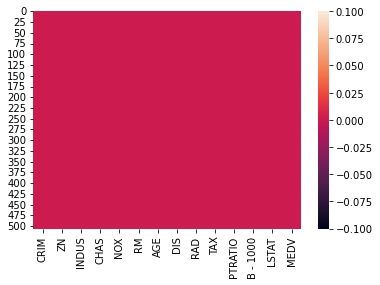

In [52]:
# Visualization for finding null values

sns.heatmap(df.isnull())
plt.show()

In [53]:
# To check every column is in numeric type
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS          int64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B - 1000    float64
LSTAT       float64
MEDV        float64
dtype: object

In [54]:
# To check duplicate values/rows
df.duplicated().sum()

0

In [55]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B - 1000,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


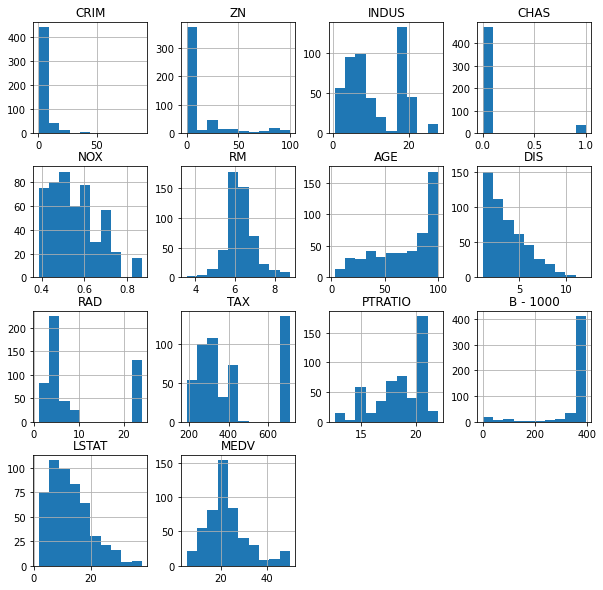

In [56]:
# Visualizing numeric data distribution using histograms

# Create a 4x4 grid of histograms with proper layout
df.hist(figsize=(10, 10), layout=(4, 4), sharex=False)

# Display the histograms
plt.show()


<AxesSubplot:>

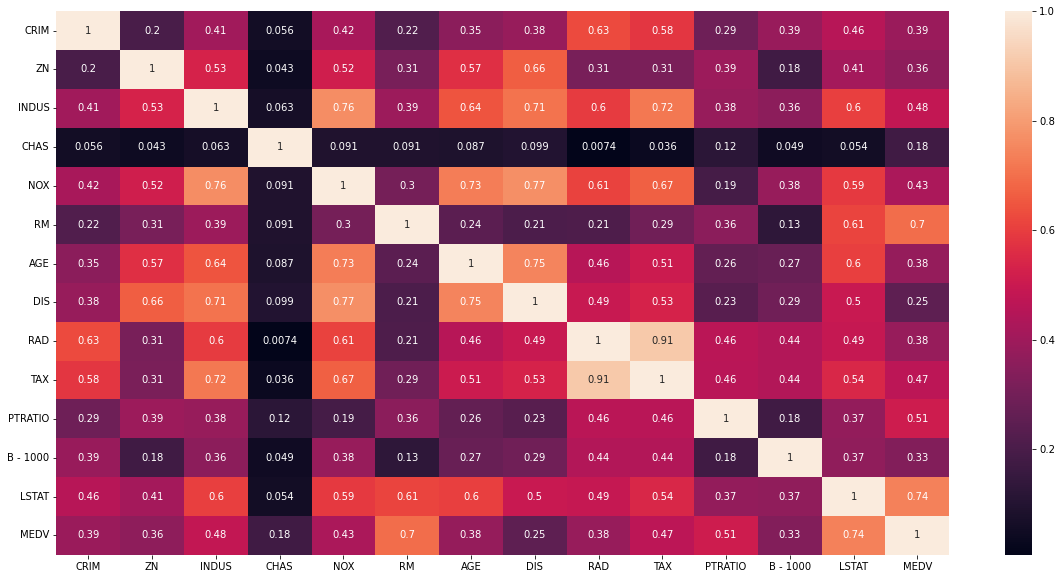

In [57]:
#correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

### EXPLORATORY DATA ANALYSIS

We will be using MEDV column as price and other columns as inputs

Checking relationship between MEDV(price) and LTSTAT, RM, PTRATIO, INDUS, TAX  

Text(0, 0.5, 'Price')

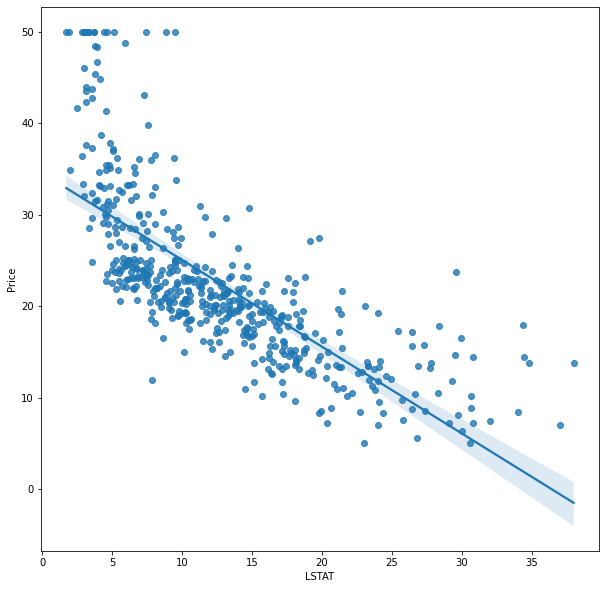

In [58]:
#relation between lower status of the population and price
plt.figure(figsize=(10,10))
sns.regplot(data= df , x ='LSTAT' , y = 'MEDV')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

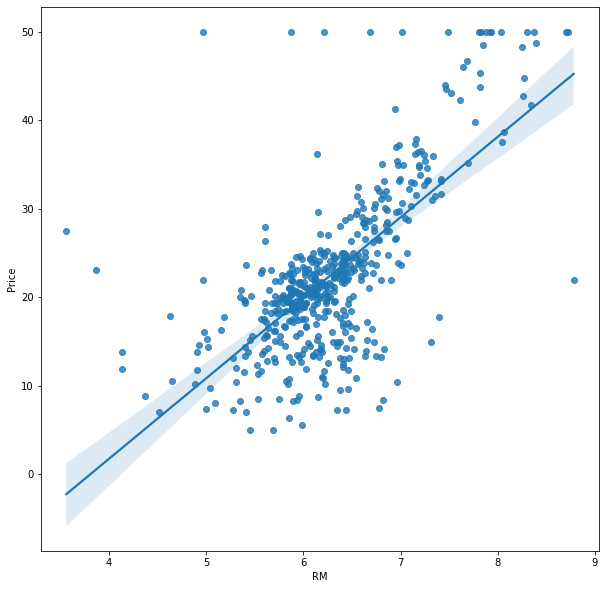

In [59]:
#Number of rooms and price
plt.figure(figsize=(10,10))
sns.regplot(data= df , x ='RM' , y = 'MEDV')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

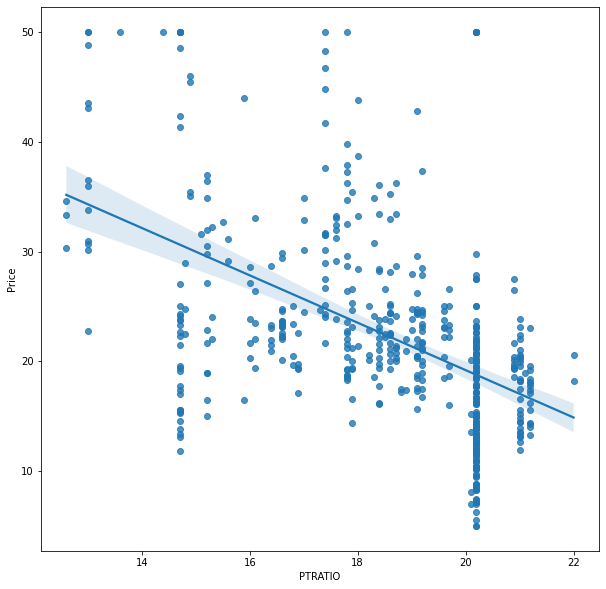

In [60]:
#relation between pupil teacher ratio of town and price
plt.figure(figsize=(10,10))
sns.regplot(data= df , x ='PTRATIO' , y = 'MEDV')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

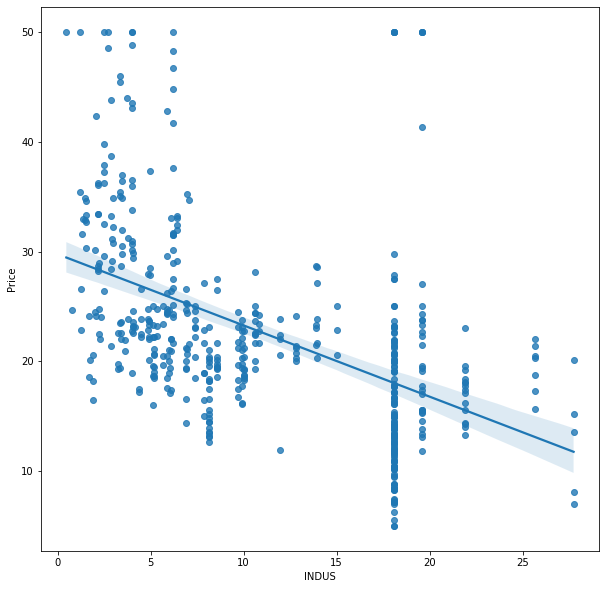

In [61]:
#relation between non retail bussiness acres per town and MEDV(price)
plt.figure(figsize = (10,10))
sns.regplot(data = df , x = 'INDUS', y= "MEDV")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

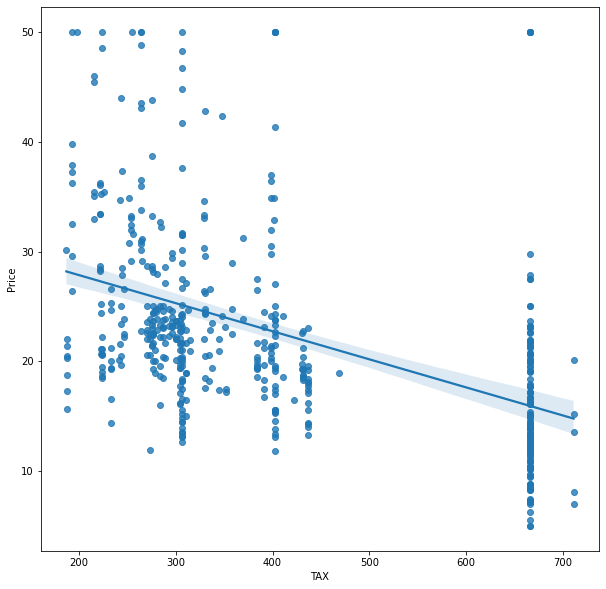

In [62]:
#relation between TAX and price
plt.figure(figsize=(10,10))
sns.regplot(data= df , x ='TAX' , y = 'MEDV')
plt.ylabel("Price")

### SPLITTING THE DATA

In [63]:
X = df.drop(["MEDV"],axis=1)
y = df["MEDV"]

In [64]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### SCALING DATA
If you take a look at the data description, you'll notice that it has different ranges for each feature, this can effect out model while learning, it will tend to focus on larger values making it biased, scaling this data to a standard variance range.

In [65]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [66]:
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [67]:
X_train_scaled.shape, X_test_scaled.shape

((404, 13), (102, 13))

### LINEAR REGRESSION MODEL 

In [68]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled,y_train)

LinearRegression()

In [69]:
preds_lin = lin_model.predict(X_test_scaled)
mae_lin = mean_absolute_error(y_test,preds_lin)
mse_lin = mean_squared_error(y_test,preds_lin)
print(f"Our mean squared error is : {mse_lin}\nOur mean absolute error is : {mae_lin}")

Our mean squared error is : 24.291119474973517
Our mean absolute error is : 3.189091965887848


### DECISION TREE MODEL

In [70]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [71]:
preds_tree = tree_model.predict(X_test_scaled)
mae_tree = mean_absolute_error(y_test,preds_tree)
mse_tree = mean_squared_error(y_test,preds_tree)
print(f"Our mean squared error is : {mse_tree}\nOur mean absolute error is : {mae_tree}")

Our mean squared error is : 17.30088235294118
Our mean absolute error is : 2.6754901960784316


### RANDOM FOREST MODEL 

In [72]:
forest_model = RandomForestRegressor(n_estimators=10,random_state=13)
forest_model.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=10, random_state=13)

In [73]:
preds_forest = forest_model.predict(X_test_scaled)
mae_forest = mean_absolute_error(y_test,preds_forest)
mse_forest = mean_squared_error(y_test,preds_forest)
print(f"Our mean squared error is : {mse_forest}\nOur mean absolute error is : {mae_forest}")

Our mean squared error is : 7.767089215686276
Our mean absolute error is : 2.010882352941177


### HYPERPARAMETER TUNING

In [101]:
# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [103]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
# Get Best Parameters and Best Model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
# Evaluate on Test Data
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 9.601661432536883
Mean Absolute Error: 2.134544339284536


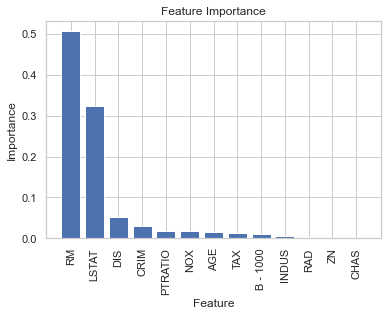

In [106]:
# Visualization of Feature Importance
feature_importances = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

### MODEL PERFORMANCE COMPARISION

In [75]:
data = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse_lin,mse_tree,mse_forest],
    "MAE": [mae_lin,mae_tree,mae_forest],
}

df = pd.DataFrame(data)

df.head()

,Model,MSE,MAE
0,Linear Regression,24.291119,3.189092
1,Decision Tree,17.300882,2.675490
2,Random Forest,7.767089,2.010882


<Figure size 720x432 with 0 Axes>

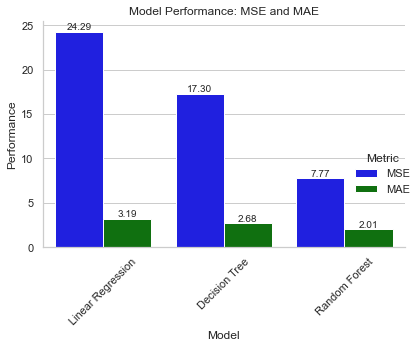

In [107]:
# Melt the DataFrame for plotting
melted_df = df.melt(id_vars=["Model"], value_vars=["MSE", "MAE"], var_name="Metric", value_name="Value")

# Create a catplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.catplot(data=melted_df, x="Model", y="Value", hue="Metric", kind="bar", palette=["blue", "green"])
g.set_axis_labels("Model", "Performance")
g.set_titles("Model Performance: {col_name}")
plt.title("Model Performance: MSE and MAE")
plt.xticks(rotation=45)

# Annotate bars with values
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
            fontsize=10, ha='center', va='bottom')

plt.tight_layout()

plt.show()

# Additional Approach - ANN

### DEEP LEARNING MODEL 
We will building a simple Feed Forward Neural Network Architecture, composed of 2 hidden layers & an output layer, the architecture follows this structure :

- Dense Layer with 128 Neurons, and ReLU as the activation function.
- Dense Layer with 64 Neurons, and ReLU as the activation function.
- Dense Layer with 1 Neuron, and a linear activation function, this is a acting as our output layer, that's outputing our regression prediction.
We will be using Mean Squared Error(MSE) as our loss function throughout this regression task, and our metric of evaluating model' performance will be Mean Absolute Error(MAE).

In [84]:
model = Sequential([
    Dense(units=128,input_dim=13,activation="relu"),
    Dense(units=64,activation="relu"),
    Dense(units=1,activation="linear"),
])

In [85]:
model.compile(
    loss='mean_squared_error',
    optimizer="adam",
    metrics=["mae"]
)

In [86]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=100, batch_size = 5)

Epoch 1/100
65/65 [==============================] - 1s 8ms/step - loss: 463.7986 - mae: 19.1252 - val_loss: 182.0098 - val_mae: 11.7000
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 86.5047 - mae: 6.8719 - val_loss: 33.1117 - val_mae: 4.0296
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 28.8389 - mae: 3.9191 - val_loss: 24.9762 - val_mae: 3.6188
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 21.5146 - mae: 3.4246 - val_loss: 22.6268 - val_mae: 3.3357
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 18.6305 - mae: 3.2022 - val_loss: 21.1533 - val_mae: 3.2545
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 16.2494 - mae: 2.9491 - val_loss: 18.6455 - val_mae: 2.9994
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 14.6504 - mae: 2.8128 - val_loss: 19.1235 - val_mae: 3.0915
Epoch 8/100
65/65 [==============================] - 0s 2ms/step 

65/65 [==============================] - 0s 3ms/step - loss: 3.7046 - mae: 1.4138 - val_loss: 10.7112 - val_mae: 2.3796
Epoch 63/100
65/65 [==============================] - 0s 3ms/step - loss: 4.1372 - mae: 1.4712 - val_loss: 10.3459 - val_mae: 2.3677
Epoch 64/100
65/65 [==============================] - 0s 3ms/step - loss: 3.8110 - mae: 1.4452 - val_loss: 10.8503 - val_mae: 2.3653
Epoch 65/100
65/65 [==============================] - 0s 3ms/step - loss: 4.0704 - mae: 1.4813 - val_loss: 9.8710 - val_mae: 2.3266
Epoch 66/100
65/65 [==============================] - 0s 3ms/step - loss: 4.3028 - mae: 1.5091 - val_loss: 10.7458 - val_mae: 2.3479
Epoch 67/100
65/65 [==============================] - 0s 3ms/step - loss: 3.8016 - mae: 1.3749 - val_loss: 10.4082 - val_mae: 2.4156
Epoch 68/100
65/65 [==============================] - 0s 3ms/step - loss: 3.5884 - mae: 1.3943 - val_loss: 10.5846 - val_mae: 2.3703
Epoch 69/100
65/65 [==============================] - 0s 3ms/step - loss: 3.4260 - 

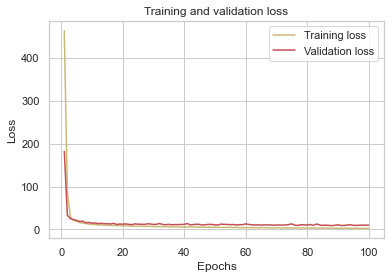

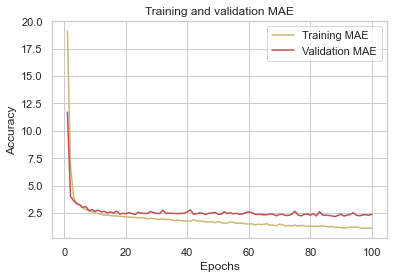

In [87]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Model Evaluation

In [90]:
ann_mse,ann_mae = model.evaluate(X_test_scaled,y_test)
print(f"Our mean squared error is : {mse}\nOur mean absolute error is : {mae}")

4/4 [==============================] - 0s 5ms/step - loss: 12.0143 - mae: 2.3068
Our mean squared error is : 12.014304161071777
Our mean absolute error is : 2.3068270683288574


In [91]:
preds = model.predict(X_test_scaled[:6])
y_values = y_test[:6].values
for i in range(6):
    print(f"Model predicted the house value to be {preds[i][0]} While the real value is {y_values[i]} with a difference of {np.abs(y_values[i]-preds[i][0])} ")

1/1 [==============================] - 0s 16ms/step
Model predicted the house value to be 28.194629669189453 While the real value is 23.6 with a difference of 4.594629669189452 
Model predicted the house value to be 34.0858154296875 While the real value is 32.4 with a difference of 1.6858154296875014 
Model predicted the house value to be 13.921497344970703 While the real value is 13.6 with a difference of 0.3214973449707035 
Model predicted the house value to be 24.61977195739746 While the real value is 22.8 with a difference of 1.8197719573974602 
Model predicted the house value to be 15.691605567932129 While the real value is 16.1 with a difference of 0.4083944320678725 
Model predicted the house value to be 20.702646255493164 While the real value is 20.0 with a difference of 0.7026462554931641 


In [92]:
# Checking Training and Testing loss (This is the last iteration from above where our model stopped)

print('Training_loss :',model.evaluate(X_train_scaled,y_train))
print('Testing_loss :',model.evaluate(X_test_scaled,y_test))

13/13 [==============================] - 0s 1ms/step - loss: 3.6538 - mae: 1.2886
Training_loss : [3.6537742614746094, 1.288634181022644]
4/4 [==============================] - 0s 0s/step - loss: 12.0143 - mae: 2.3068
Testing_loss : [12.014304161071777, 2.3068270683288574]


In [95]:
data2 = {
    "Model": ["ANN", "Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [ann_mse,mse_lin,mse_tree,mse_forest],
    "MAE": [ann_mae,mae_lin,mae_tree,mae_forest],
}

df2 = pd.DataFrame(data2)

df2.head()

,Model,MSE,MAE
0,ANN,12.014304,2.306827
1,Linear Regression,24.291119,3.189092
2,Decision Tree,17.300882,2.675490
3,Random Forest,7.767089,2.010882


<Figure size 1080x720 with 0 Axes>

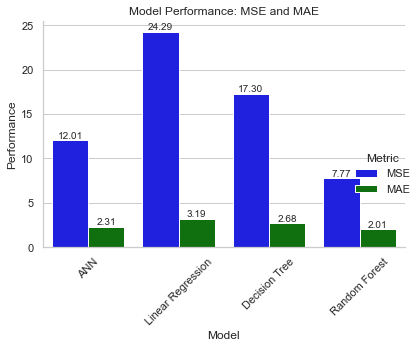

In [100]:
# Melt the DataFrame for plotting
melted_df = df2.melt(id_vars=["Model"], value_vars=["MSE", "MAE"], var_name="Metric", value_name="Value")

# Create a catplot using Seaborn
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
g = sns.catplot(data=melted_df, x="Model", y="Value", hue="Metric", kind="bar", palette=["blue", "green"])
g.set_axis_labels("Model", "Performance")
g.set_titles("Model Performance: {col_name}")
plt.title("Model Performance: MSE and MAE")
plt.xticks(rotation=45)

# Annotate bars with values
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
            fontsize=10, ha='center', va='bottom')

plt.tight_layout()

plt.show()

### CONCLUSION
In this research, we compared the performance of neural networks against linear regression, decision trees, and random forests on the Boston housing price prediction regression problem.

We found that neural networks outperformed linear regression and decision trees, but they were not able to outperform random forests.

This finding suggests that neural networks may not be the best choice for all regression problems. In some cases, simpler models, such as random forests, may be more effective.

There are a few possible explanations for this finding such as :

1. Neural networks are more complex models than random forests. This means that they require more data to train, and they are more prone to overfitting.

2. Neural networks are not as interpretable as random forests. This can make it difficult to understand how the model is making its predictions, thus it will be dificult to have a guidance on how to help it.